# Sentiment Analysis using a1-D C.N.N.

According to dictionary, sentiment analysis (aka opinion mining) is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.

Our objective is to train a neural network and mould it into a textual sentiment aficionado.

## 1. Import Libraries.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
from keras.datasets import imdb

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

from sklearn.metrics import accuracy_score

Using TensorFlow backend.


## 2. Load the data.

In [2]:
max_vocab_size = 5000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = max_vocab_size)
print("Number of reviews in training set =", len(train_data))
print("Number of reviews in testing set =", len(test_data))

17465344/17464789 [==============================] - 0s 0us/step
Number of reviews in training set = 25000
Number of reviews in testing set = 25000


In [0]:
max_words = 500
train_data = sequence.pad_sequences(train_data, maxlen = max_words, padding='post')
test_data = sequence.pad_sequences(test_data, maxlen = max_words, padding='post')

## 3. Define the neural network.

We will use a one dimensional convolutional neural network which will help us identify local patterns in senteces.

In [32]:
######## HYPER-PARAMETERS ########
epochs = 2
batch_size = 128
learning_rate = 0.001
#################################

model = Sequential()
model.add(Embedding(max_vocab_size, 64, input_length = max_words))

model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

model.fit(
            train_data, 
            train_labels,
            epochs = epochs,
            batch_size = batch_size,
            validation_split = 0.2 
          )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 500, 64)           320000    
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 500, 32)           6176      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 250, 32)           0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 8000)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               1024128   
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 129       
Total params: 1,350,433
Trainable params: 1,350,433
Non-trainable params: 0
_________________________________________________________________


## 4. Testing our model.
We got the highest **validation accuracy of 88.28%** and a **test accuracy of 88.34%**. We trained a fine model. 


In [34]:
predicted_labels = model.predict(test_data)
print("accuracy =", accuracy_score(test_labels, predicted_labels.round())*100, "%")

accuracy = 88.344 %


## 5. Confusion Matrix.

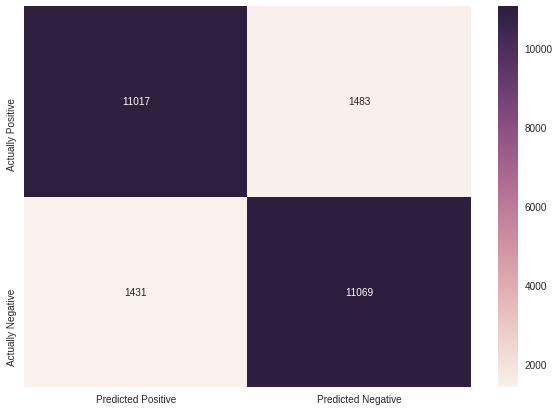

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

cm = confusion_matrix(test_labels, predicted_labels.round())
df_cm = pd.DataFrame(cm, index = ['Actually Positive', 'Actually Negative'], columns  = ['Predicted Positive', 'Predicted Negative'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')